<a href="https://colab.research.google.com/github/linmeimei0512/Education-Training/blob/main/MobileNet_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📜 教育訓練 - 在 PyTorch 建立一個 AI Model

## <font color=#FFA500>什麼是 PyTorch ?</font>

<font color=#F08080>PyTorch</font> 是 Facebook (Meta Platfroms) 在 2017 年開源的<font color=#F08080>深度學習框架 (DeepLearning Framework)</font>。  
因為其語法簡潔、直觀且活用性極大，目前已成為深度學習熱門框架之一。  

### 📌 [Tensor](https://pytorch.org/docs/stable/tensors.html)

<font color=#F08080>Tensor (torch.Tensor)</font> 是 PyTorch 最基本的元素，是一個多維的陣列。  
用法和 NumPy 類似，不過 NumPy 只能在 CPU 上運算，但是 Tensor 可以在 GPU 上運算。  

Tensor 定義了很多種資料類型，默認為 torch.FloatTensor。  

> <font color=#F08080>💡 這邊要注意，CPU 和 GPU 所使用的類型並不相同，之後大家在使用上要多注意。</font>

</br>

![](https://drive.google.com/uc?id=1UoYpd25Pf6qlk5Ol_ks7rw9fNKcHs2mM)

我們來嘗試建立幾個 Tensor 張量吧！  

1. 建立一個給 <font color=#F08080>CPU</font> 使用的 Tensor 張量，資料型態為 <font color=#F08080>torch.float32</font>、大小為 <font color=#F08080>2x4</font>、值全為 0

In [2]:
import torch

data = torch.zeros([2, 4], dtype=torch.float32)
print('data: {}'.format(data))

data: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])


2. 建立一個給 <font color=#F08080>GPU</font> 使用的 Tensor 張量，資料型態為 <font color=#F08080>torch.float64</font>、大小為 <font color=#F08080>2x4</font>、值全為 1

In [3]:
import torch

data = torch.ones([2, 4], dtype=torch.float64, device='cuda:0')
print('data: {}'.format(data))

data: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)


這時候你可能會出現 <font color=#F08080>Found no NVIDIA driver on your system.</font> 的錯誤訊息。  
不用太緊張，如果是在 <font color=#F08080>Colab</font> 上執行的話，單純是因為沒有啟用含有 GPU 的主機。  
如果是在本地端的 PC 上執行就很有可能是因為 GPU 的 driver 沒有安裝好。

</br>

![](https://drive.google.com/uc?id=12k3BxTQnV1NAwAB9oZ2poExJ2Bft4tOp)

為了必免此錯誤產生，我們通常會加一個判斷，來確保 GPU 可以正常使用

In [4]:
import torch

if not torch.cuda.is_available():
  print('GPU is unavailable!')
else:
  data = torch.ones([2, 4], dtype=torch.float64, device='cuda:0')
  print('data: {}'.format(data))

data: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)


### 📌 [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)

<font color=#F08080>nn.Module</font> 是 PyTorch 最重要的 class 類別，因為所有的 Model 都是基於 nn.Model 所搭建起來的。  
以下是 nn.Module 最重要的兩個 function  
1. \_\_init\_\_(self)  
    是 model 初始化的地方，所有的 operator 都會寫在此


2. forward(self, x)  
    是 model 邏輯運算的地方，x 就是 input 的值

讓我們簡單的創建一個 PyTorch model 吧！  

因為我們還沒有學任何的 operator 所以在 \_\_init\_\_ 中就不放任何的 operator。  
至於 forward 中我們就先簡單的做個乘法吧。

In [5]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
      return x * x

實體化一個我們剛剛建立的 model  
並且也建立一個值為 2 的 Tensor 張量，當作 model 的 input

In [6]:
# create model
model = Model()

# create tensor
input_data = torch.tensor(2.)
print('input data: {}'.format(input_data))

# calculate
output_date = model(input_data)
print('output data: {}'.format(output_date))

input data: 2.0
output data: 4.0


### 📌 [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)  

<font color=#F08080>nn.Conv2d</font> 是在 PyTorch 中的二維卷積  
在 PyTorch 官網中有寫到 nn.Conv2d 的算式如下：

![](https://drive.google.com/uc?id=1yO0FRB3e3ZgKGvebs9YovBcvmdhFdDbf)

看不懂沒關係，這一點都不重要

接著我們在官網上也可以看到 nn.Conv2d 所有的 parameters  
其中 <font color=#F08080>in_channels</font>、<font color=#F08080>out_channels</font> 和 <font color=#F08080>kernel_size</font> 是一定必要的

![](https://drive.google.com/uc?id=1bMUN-tmI66ol_qD2Nm0HqE0gSZ3ilzn-)

看不懂也沒關係，之後會再說明

#### 🔥 Convolution

我們先來大略說明一下 Convolution 到底是怎麼運作的  

要完成一個 Convolution 一定要有 <font color=#F08080>input</font> 和 <font color=#F08080>kernel(卷積核)</font> 這兩個元素  

<img width="40%" src="https://drive.google.com/uc?id=15acasb-waosdCcJehPW0cy48ZpiJik_g">
</br>
</br>

大家有可能在其他地方會看到有些人把 kernel 的地方改叫做 <font color=#F08080>filter(過濾器)</font>  
其實兩者的關係很簡單，如果一個 convolution 有很多個 kernel 那麼我們就可以把所有的 kernel 當作是一個 filter  
<img width="50%" src="https://drive.google.com/uc?id=1sj5YELkMFxlxiHeDdC13KENGdhWxLBG7">
</br>
</br>

從下方的動畫可以很明顯地看到，卷積的運算就是從上到下，從左到右，不停的利用 kernel 和 input 做矩陣的乘積運算

<img width="60%" src="https://drive.google.com/uc?id=1BKYOoTcCKZxtL_Vl6KRzzCDzLkDVllcp">

了解 Convolution 後，我們來寫個程式印證一下

In [7]:
import torch
import torch.nn as nn

# input
input_data = torch.Tensor(
    [[[[0, 0, 80, 80],
       [0, 76, 80, 81],
       [0, 75, 81, 81],
       [0, 0, 80, 82]]]]
)
print('input data: {}\n{}'.format(input_data.shape, input_data))

# create convolution
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(2, 2))

# output
output_data = conv(input_data)
print('\noutput data: {}\n{}'.format(output_data.shape, output_data))

input data: torch.Size([1, 1, 4, 4])
tensor([[[[ 0.,  0., 80., 80.],
          [ 0., 76., 80., 81.],
          [ 0., 75., 81., 81.],
          [ 0.,  0., 80., 82.]]]])

output data: torch.Size([1, 1, 3, 3])
tensor([[[[ 16.3052,  18.1751,  10.4671],
          [-14.1422,   8.7883,  10.5016],
          [-29.6135, -24.1190,  10.1603]]]], grad_fn=<ConvolutionBackward0>)


這時候會發現為什麼在 nn.Conv2d 我們只能設定 kernel_size 而無法指定 kernel 的值呢？  
而且 output 的值跟我們算的完全不一樣

因為 convolution 的 kernel 應該是隨機或是常態分佈的值，因此通常我們不會設定 kernel 真實的值  
不過沒關係，PyTorch 留了另一個 nn.functional.conv2d 來讓我們可以自訂 kernel 值

In [8]:
import torch
import torch.nn.functional as F

# input
input_data = torch.Tensor(
    [[[[0, 0, 80, 80],
      [0, 76, 80, 81],
      [0, 75, 81, 81],
      [0, 0, 80, 82]]]]
)
print('input data: {}\n{}'.format(input_data.shape, input_data))

# kernel
kernel = torch.Tensor(
    [[[[-1, 0],
      [-1, 1]]]]
)
print('\nkernel: {}\n{}'.format(kernel.shape, kernel))

# output
output_data = F.conv2d(input=input_data, weight=kernel)
print('\noutput data: {}\n{}'.format(output_data.shape, output_data))

input data: torch.Size([1, 1, 4, 4])
tensor([[[[ 0.,  0., 80., 80.],
          [ 0., 76., 80., 81.],
          [ 0., 75., 81., 81.],
          [ 0.,  0., 80., 82.]]]])

kernel: torch.Size([1, 1, 2, 2])
tensor([[[[-1.,  0.],
          [-1.,  1.]]]])

output data: torch.Size([1, 1, 3, 3])
tensor([[[[ 76.,   4., -79.],
          [ 75., -70., -80.],
          [  0.,   5., -79.]]]])


#### 🔥 RGB

通常 convolution 的 input 不太可能是 1 個 channel  
convolution 最常使用在圖像識別，而一個像素是利用 RGB 三個值構成  
因此一開始的 input 的 channel 一定是 3

那麼多 channel 的 convolution 該如何運算呢？  
我們利用 3 channels 來解釋  

根據下方的動畫我們可以清楚地看到，每個 channel 是先分開跟個別的 kenrel 做乘積  
因此這邊我們可以知道 <font color=#F08080>kernel 的 channel 個數必須和 input 相同</font>  
個別做完乘機後，再把相同位置的值相加

<img width="70%" src="https://drive.google.com/uc?id=1hzHRJ1qMmS6YUDIcg6vI5OT1QYC50Mtc">

寫個程式印證一下

In [9]:
import torch
import torch.nn.functional as F

# input
input_data = torch.Tensor(
    [[[[0, 0, 80, 80],
       [0, 76, 80, 81],
       [0, 75, 81, 81],
       [0, 0, 80, 82]],
      [[0, 0, 80, 80],
       [0, 76, 80, 81],
       [0, 75, 81, 81],
       [0, 0, 80, 82]],
      [[0, 0, 80, 80],
       [0, 76, 80, 81],
       [0, 75, 81, 81],
       [0, 0, 80, 82]]]]
)
print('input data: {}\n{}'.format(input_data.shape, input_data))

# kernel
kernel = torch.Tensor(
    [[[[-1, 0, 0],
       [-1, 1, 1],
       [0, 0, 1]],
      [[-1, 0, 0],
       [-1, 1, 1],
       [0, 0, 1]],
      [[-1, 0, 0],
       [-1, 1, 1],
       [0, 0, 1]]]]
)
print('\nkernel: {}\n{}'.format(kernel.shape, kernel))

# output
output_data = F.conv2d(input=input_data, weight=kernel)
print('\noutput data: {}\n{}'.format(output_data.shape, output_data))

input data: torch.Size([1, 3, 4, 4])
tensor([[[[ 0.,  0., 80., 80.],
          [ 0., 76., 80., 81.],
          [ 0., 75., 81., 81.],
          [ 0.,  0., 80., 82.]],

         [[ 0.,  0., 80., 80.],
          [ 0., 76., 80., 81.],
          [ 0., 75., 81., 81.],
          [ 0.,  0., 80., 82.]],

         [[ 0.,  0., 80., 80.],
          [ 0., 76., 80., 81.],
          [ 0., 75., 81., 81.],
          [ 0.,  0., 80., 82.]]]])

kernel: torch.Size([1, 3, 3, 3])
tensor([[[[-1.,  0.,  0.],
          [-1.,  1.,  1.],
          [ 0.,  0.,  1.]],

         [[-1.,  0.,  0.],
          [-1.,  1.,  1.],
          [ 0.,  0.,  1.]],

         [[-1.,  0.,  0.],
          [-1.,  1.,  1.],
          [ 0.,  0.,  1.]]]])

output data: torch.Size([1, 1, 2, 2])
tensor([[[[711., 498.],
          [708., 279.]]]])


#### 🔥 Stride

<font color=#F08080>Stride</font> 代表 kernel <font color=#F08080>上下左右移動的步長</font>，PyTorch 預設的 stride 是 1  
我們可以設定 stride 來減少 output 的資料量  
如果我們設定為 2，那麼 kernel 每次會移動 2 個 pixel，如下圖

<img width="60%" src="https://drive.google.com/uc?id=1-NFGCEWE64Jlz-v3ft6E2hQsUEQnMynE">

一樣我們來用程式驗證一下

In [10]:
import torch
import torch.nn.functional as F

# input
input_data = torch.Tensor(
    [[[[0, 0, 80, 80],
      [0, 76, 80, 81],
      [0, 75, 81, 81],
      [0, 0, 80, 82]]]]
)
print('input data: {}\n{}'.format(input_data.shape, input_data))

# kernel
kernel = torch.Tensor(
    [[[[-1, 0],
      [-1, 1]]]]
)
print('\nkernel: {}\n{}'.format(kernel.shape, kernel))

# output
output_data = F.conv2d(input=input_data, weight=kernel, stride=2)
print('\noutput data: {}\n{}'.format(output_data.shape, output_data))

input data: torch.Size([1, 1, 4, 4])
tensor([[[[ 0.,  0., 80., 80.],
          [ 0., 76., 80., 81.],
          [ 0., 75., 81., 81.],
          [ 0.,  0., 80., 82.]]]])

kernel: torch.Size([1, 1, 2, 2])
tensor([[[[-1.,  0.],
          [-1.,  1.]]]])

output data: torch.Size([1, 1, 2, 2])
tensor([[[[ 76., -79.],
          [  0., -79.]]]])


#### 🔥 Padding

<font color=#F08080>Padding</font> 代表在 input 的<font color=#F08080>上下左右填充</font>一定的值  
例如下圖，是 padding = 1 的結果

<img width="60%" src="https://drive.google.com/uc?id=1R_SrFHVpEjnwtNhSRmRLj8Pe5QWC2E7a">

至於 padding 要填什麼值呢？  
通常都是填充 0, PyTorch 預設也是填充 0  
如果要設定填充的值可以利用 <font color=#F08080>padding_mode</font> 參數來設定  

下面的動畫是 padding = 1 的卷積計算

<img width="60%" src="https://drive.google.com/uc?id=1XaTy54BY6zIIYmeC9f7WELFsJ7cu2kF1">

最後我們一樣利用程式來驗證一下  

In [11]:
import torch
import torch.nn.functional as F

# input
input_data = torch.Tensor(
    [[[[0, 0, 80, 80],
      [0, 76, 80, 81],
      [0, 75, 81, 81],
      [0, 0, 80, 82]]]]
)
print('input data: {}\n{}'.format(input_data.shape, input_data))

# kernel
kernel = torch.Tensor(
    [[[[-1, 0, 0, 0],
       [-1, 1, 1, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1]]]]
)
print('\nkernel: {}\n{}'.format(kernel.shape, kernel))

# output
output_data = F.conv2d(input=input_data, weight=kernel, padding=1)
print('\noutput data: {}\n{}'.format(output_data.shape, output_data))

input data: torch.Size([1, 1, 4, 4])
tensor([[[[ 0.,  0., 80., 80.],
          [ 0., 76., 80., 81.],
          [ 0., 75., 81., 81.],
          [ 0.,  0., 80., 82.]]]])

kernel: torch.Size([1, 1, 4, 4])
tensor([[[[-1.,  0.,  0.,  0.],
          [-1.,  1.,  1.,  1.],
          [ 0.,  1.,  1.,  0.],
          [ 0.,  0.,  0.,  1.]]]])

output data: torch.Size([1, 1, 3, 3])
tensor([[[[237., 397., 321.],
          [311., 475., 247.],
          [156., 317., 173.]]]])


#### 🔥 Bias
在 PyTorch 中很多 operator 中都會有一個 bias 參數可以設定  
他是一個 boolean 值，預設是 True  
他代表這個 <font color=#F08080>operator 的偏置向量</font>，簡單來說就是對於這個 operator 的<font color=#F08080>激活狀態</font>控制

In [12]:
import torch.nn as nn

# create convolution
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(2, 2))
print(conv)

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(2, 2), bias=False)
print(conv)

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))
Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1), bias=False)


### 📌 [nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

<font color=#F08080>nn.Sequential</font> 是 nn.Module 的容器，我們可以將<font color=#F08080>多個 Module 利用 Sequentail 打包再一起</font>  

我們來嘗試利用 Sequntail 來打包兩個 nn.Linear

In [13]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self):
    super().__init__()

    self.node = nn.Sequential(
        nn.Linear(10, 8),
        nn.Linear(8, 2)
    )

  def forward(self, x):
    return self.node(x)

In [14]:
# create model
model = Model()
print(model)

# create randen input data
input_data = torch.randn(2, 10)
print(f'\ninput data: \n{input_data}')

# output
output_data = model(input_data)
print(f'\noutput data: \n{output_data}')

Model(
  (node): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=2, bias=True)
  )
)

input data: 
tensor([[-1.0974,  0.2018, -0.7784, -0.6486, -1.3221,  0.4280,  0.4349,  2.0677,
          0.0399,  0.0418],
        [-0.1501, -0.1487,  0.6216, -0.0336, -1.1629,  0.9153,  0.2057,  0.4506,
          0.5552, -0.7302]])

output data: 
tensor([[-0.7209, -0.5362],
        [-0.1436, -0.3724]], grad_fn=<AddmmBackward0>)


### 📌 [nn.AvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html)

<font color=#F08080>平均池化層</font>，主要用途就是將 input 做平均池化的計算  
在官網上我們一樣可以看到 nn.AvgPool2d 的所有輸入參數  
其中 <font color=#F08080>kernel_size</font> 是必要參數  
不過要注意的是 <font color=#F08080>stride 的 default 值是 kernel_size 的大小！</font>

<img width="60%" src="https://drive.google.com/uc?id=15Vm1gLz8OkU46OwaK5ZCX-b_P4wWqiW1">


舉個例子，我們的 input size 為 3x3，kernel size 設定為 2x2，stride 設定為 1  
那麼 AvgPool2d 計算過程會如下圖

<img width="40%" src="https://drive.google.com/uc?id=1pDwekIaZmTa6Q8HTTI-U42uAfax9ufqz">


利用程式來驗證一下

In [15]:
import torch
import torch.nn as nn

# input
input_data = torch.Tensor(
    [[[1, 0, 80],
      [0, 79, 81],
      [5, 0, 84]]]
)
print('input data: {}\n{}'.format(input_data.shape, input_data))

# create average pool
avg_pool = nn.AvgPool2d(kernel_size=2, stride=1)

# output
output_data = avg_pool(input_data)
print(f'\noutput data: {output_data.shape}\n{output_data}')

input data: torch.Size([1, 3, 3])
tensor([[[ 1.,  0., 80.],
         [ 0., 79., 81.],
         [ 5.,  0., 84.]]])

output data: torch.Size([1, 2, 2])
tensor([[[20., 60.],
         [21., 61.]]])


### 📌 [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

Linear 所需的參數如下  
<font color=#F08080>in_feature</font> 和 <font color=#F08080>out_feature</font> 是必須參數

<img width="60%" src="https://drive.google.com/uc?id=1YY9yh1Q77ilxxyh3rQRMYUxmsad0JDKD">



## <font color=#FFA500>MobileNet v1</font>

[Paper](https://arxiv.org/pdf/1704.04861.pdf) 在這邊大家有興趣可以去閱讀一下  

### <font color=#FF3030>📌 Depthwise Separable Convolution</font>

在 paper 中我們可以看到，MobileNet v1 團隊將傳統的 convolution 改成 <font color=#F08080>depthwise separable convolution(深度可分離卷積)</font> 簡稱 <font color=#F08080>DWS Convoution</font>  

<img width="40%" src="https://drive.google.com/uc?id=1dLnpPSpe_E1q4Mrvr55zRQKkMqrJWJJf">

至於 depthwise separable convolution 是什麼呢？這邊我們大略的說明一下  

DWS Convolution 最主要的用途就是減少傳統 convolution 的計算量  

假設 input channel = 3，filter 共有 4 個 kernel  
傳統的 convolution 的計算流程會如下圖  

<img width="60%" src="https://drive.google.com/uc?id=1gPMnvfMHaGTgi-JFPRPj-x3DUUE_8xBi">

根據上方流程我們可以算出傳統的 convolution 的參數量為 <font color=#F08080>((3x3)x3)x4 = 108</font>


Depthwise separable convolution 分為兩個步驟，分別是 <font color=#F08080>depthwise convolution</font> 和 <font color=#F08080>pointwise convolution</font>

#### 🔥 Depthwise Convolution

<font color=#F08080>Depthwise convolution</font> 會把 input 的每個 channel 拆分為一個 <font color=#F08080>group</font>  
每個 group 分別用一個 channel = 1 的 kernel 做 convolution  
最後再把所有的 feature map 做合併  
如下圖

<img width="60%" src="https://drive.google.com/uc?id=1GETf10z4G0NnHl6Tri7jKJSyOyLoPWJz">

#### 🔥 Pointwise Convolution

<font color=#F08080>Pointwise convolution</font> 則是利用 1x1 的 kernel 來做 convolution  
至於要用多少個 kernel 來組成 filter 呢？  
那就看 output 要輸出多少 channel，這邊我們需要輸出的 channel 為 4，因此需要 4 個 kernel  
如下圖

<img width="60%" src="https://drive.google.com/uc?id=1KmVFXMNoy1AHm-0RuiMYaMMS6dzJdmhY">

#### 🔥 Depthwise Separable Convolution

將 depthwise convolution 加上 pointwise convolution 就是完整的 depthwise separable convolution  

<img width="100%" src="https://drive.google.com/uc?id=1pojs7dCR4ckcGx6iEJj3B9I4FAHvcp_C">

根據上圖我們可以算出 depthwise separable convolution 的參數量為 <font color=#F08080>(3x3)x3 + ((1x1)x3)x4 = 39</font>  
<font color=#F08080>比傳統的 convolution 少將近快 3 倍之多</font>

### <font color=#FF3030>📌 Create MobileNet v1</font>

#### 🔥 Initialize PyTorch Device

在 PyTorch 中可以很輕鬆的選擇要使用 <font color=#F08080>CPU</font> 還是 <font color=#F08080>GPU</font>  
這邊我們自動偵測是否有 GPU 可使用來初始化 device

In [16]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device: {}'.format(device))

device: cuda:0


#### 🔥 Standard Convolution Block

MobileNet v1 中並非全部都使用 DWS Convolution  
在一開始的時候使用 standard convolution 來開頭的  
因此我們必須創建一個 standard convolution 模塊  

In [17]:
import torch.nn as nn

class StandardConv(nn.Module):
  def __init__(self, in_channels, out_channels, stride=1):
    super().__init__()

    self.conv = nn.Sequential(
        nn.Conv2d(in_channels=in_channels,
                  out_channels=out_channels,
                  kernel_size=3,
                  stride=stride,
                  padding=1,
                  bias=False),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )

  def forward(self, x):
    return self.conv(x)

In [18]:
import torch
from torchsummary import summary

model = StandardConv(in_channels=3, out_channels=32, stride=2)
model.to(device)
print(model)
summary(model, input_size=(3, 224, 224))

StandardConv(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              ReLU-3         [-1, 32, 112, 112]               0
Total params: 928
Trainable params: 928
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 9.19
Params size (MB): 0.00
Estimated Total Size (MB): 9.77
----------------------------------------------------------------


#### 🔥 Depthwise Separable Convolution Block

這邊我們先利用 paper 中的附圖來創建 DWS Convloution 模塊  

<img width="40%" src="https://drive.google.com/uc?id=1dLnpPSpe_E1q4Mrvr55zRQKkMqrJWJJf">

In [19]:
import torch.nn as nn

class DepthwiseSeparableConv(nn.Module):
  def __init__(self, in_channels, out_channels, stride=1):
    super().__init__()

    '''
    depthwise convolution
    '''
    self.depthwise_conv = nn.Sequential(
        nn.Conv2d(in_channels=in_channels,
                  out_channels=in_channels,
                  kernel_size=3,
                  stride=stride,
                  padding=1,
                  groups=in_channels,
                  bias=False),
        nn.BatchNorm2d(in_channels),
        nn.ReLU(inplace=True)
    )

    '''
    pointwise convolution
    '''
    self.pointwise_conv = nn.Sequential(
        nn.Conv2d(in_channels=in_channels,
                  out_channels=out_channels,
                  kernel_size=1,
                  stride=1,
                  padding=0,
                  bias=False),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )

  def forward(self, x):
    x = self.depthwise_conv(x)
    return self.pointwise_conv(x)


In [20]:
from torchsummary import summary

model = DepthwiseSeparableConv(in_channels=3, out_channels=4, stride=2)
model.to(device)
print(model)
summary(model, input_size=(3, 224, 224))

DepthwiseSeparableConv(
  (depthwise_conv): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=3, bias=False)
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (pointwise_conv): Sequential(
    (0): Conv2d(3, 4, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 3, 112, 112]              27
       BatchNorm2d-2          [-1, 3, 112, 112]               6
              ReLU-3          [-1, 3, 112, 112]               0
            Conv2d-4          [-1, 4, 112, 112]              12
       BatchNorm2d-5          [-1, 4, 112, 112]               8
              ReLU-6          [-1, 4, 112, 112]          

#### 🔥 MobileNet v1

根據 paper 中的 MobileNet v1 架構圖，我們可以如法炮製的建立一個 MobileNet v1  
> <font color=#F08080>💡 這邊要注意 paper 中最後一個 DWS convolution 的 stride 寫錯了，應該為 1</font>

<img width="60%" src="https://drive.google.com/uc?id=1ej2h25JpH-VOJgvlyIAvkG_hE96biHes">  

In [21]:
import torch.nn as nn

class MobileNetv1(nn.Module):
  def __init__(self, in_channels, num_classes):
    super().__init__()

    self.layers = nn.Sequential(
        StandardConv(in_channels, 32, 2),
        DepthwiseSeparableConv(32, 64, 1),
        DepthwiseSeparableConv(64, 128, 2),
        DepthwiseSeparableConv(128, 128, 1),
        DepthwiseSeparableConv(128, 256, 2),
        DepthwiseSeparableConv(256, 256, 1),
        DepthwiseSeparableConv(256, 512, 2),
        DepthwiseSeparableConv(512, 512, 1),
        DepthwiseSeparableConv(512, 512, 1),
        DepthwiseSeparableConv(512, 512, 1),
        DepthwiseSeparableConv(512, 512, 1),
        DepthwiseSeparableConv(512, 512, 1),
        DepthwiseSeparableConv(512, 1024, 2),
        DepthwiseSeparableConv(1024, 1024, 1)
    )

    self.avg_pool = nn.AvgPool2d(7)
    self.fc = nn.Linear(1024, num_classes)

  def forward(self, x):
    x = self.layers(x)
    x = self.avg_pool(x)
    x = torch.flatten(x, 1)   # (1, 1024, 1, 1) -> (1, 1024)
    x = self.fc(x)
    return x

In [22]:
import torch
from torchsummary import summary
torch.set_printoptions(threshold=10)

model = MobileNetv1(in_channels=3, num_classes=1000)
model.to(device)
# print(model)
summary(model, input_size=(3, 224, 224))

# create randen input data
input_data = torch.randn((1, 3, 224, 224), device=device)
print(f'\ninput data: {input_data.shape}\n{input_data}')
print(device)

# output
output_data = model(input_data)
print(f'\noutput data: {output_data.shape}\n{output_data}')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              ReLU-3         [-1, 32, 112, 112]               0
      StandardConv-4         [-1, 32, 112, 112]               0
            Conv2d-5         [-1, 32, 112, 112]             288
       BatchNorm2d-6         [-1, 32, 112, 112]              64
              ReLU-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]           2,048
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
DepthwiseSeparableConv-11         [-1, 64, 112, 112]               0
           Conv2d-12           [-1, 64, 56, 56]             576
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1

In [23]:
import torch.nn as nn

class MobileNetv1(nn.Module):
  def __init__(self, in_channels, num_classes, width_multiplier):
    super().__init__()

    self.layers = nn.Sequential(
        StandardConv(in_channels, int(32 * width_multiplier), 2),
        DepthwiseSeparableConv(int(32 * width_multiplier), int(64 * width_multiplier), 1),
        DepthwiseSeparableConv(int(64 * width_multiplier), int(128 * width_multiplier), 2),
        DepthwiseSeparableConv(int(128 * width_multiplier), int(128 * width_multiplier), 1),
        DepthwiseSeparableConv(int(128 * width_multiplier), int(256 * width_multiplier), 2),
        DepthwiseSeparableConv(int(256 * width_multiplier), int(256 * width_multiplier), 1),
        DepthwiseSeparableConv(int(256 * width_multiplier), int(512 * width_multiplier), 2),
        DepthwiseSeparableConv(int(512 * width_multiplier), int(512 * width_multiplier), 1),
        DepthwiseSeparableConv(int(512 * width_multiplier), int(512 * width_multiplier), 1),
        DepthwiseSeparableConv(int(512 * width_multiplier), int(512 * width_multiplier), 1),
        DepthwiseSeparableConv(int(512 * width_multiplier), int(512 * width_multiplier), 1),
        DepthwiseSeparableConv(int(512 * width_multiplier), int(512 * width_multiplier), 1),
        DepthwiseSeparableConv(int(512 * width_multiplier), int(1024 * width_multiplier), 2),
        DepthwiseSeparableConv(int(1024 * width_multiplier), int(1024 * width_multiplier), 1)
    )

    self.avg_pool = nn.AdaptiveAvgPool2d(1)
    self.fc = nn.Linear(int(1024 * width_multiplier), num_classes)

  def forward(self, x):
    x = self.layers(x)
    x = self.avg_pool(x)
    x = torch.flatten(x, 1)   # (1, 1024, 1, 1) -> (1, 1024)
    x = self.fc(x)
    return x

### <font color=#FF3030>📌 Train MNIST By MobileNet v1</font>

#### 🔥 Create datasets transform

在 PyTorch 中都會建立一個 <font color=#F08080>trasnforms</font> 來做 datasets 的格式轉換  
transforms 可以做很多事情，例如標準化、各種前處理又或是資料轉成 Tensor 格式  

這邊我們只需要做兩件事情：  

1.   轉換成 Tensor 格式 : [transforms.ToTensor](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html)
2.   做標準化 : [transforms.Normalize](https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html)



In [24]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#### 🔥 Download MNIST datasets

在 PyTorch 官方提供很多的 datasets 來讓我們輕鬆使用  
這些 datasets 都放在 <font color=#F08080>torchvision.datasets</font> 中  

這邊我們使用 <font color=#F08080>torchvision.datasets.MNIST</font> 來下載 <font color=#F08080>MNIST</font> 的 datasets  


In [25]:
import torch
import torchvision
import torchvision.datasets as datasets

# Donwload MNIST training and validation datasets
training_datasets = datasets.MNIST(root='./datasets', train=True, transform=transform, download=True)
validation_datasets = datasets.MNIST(root='./datasets', train=False, transform=transform, download=True)

# Class labels
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

print('Training datasets has {}'.format(len(training_datasets)))
print('Validation datasets has {}'.format(len(validation_datasets)))

100%|██████████| 9912422/9912422 [00:00<00:00, 196177546.46it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 40338226.38it/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 50352321.78it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5651298.95it/s]


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Training datasets has 60000
Validation datasets has 10000


在 PyTorch 中所有的 datasets 都會利用 <font color=#F08080>DataLoader</font> 做載入的動作  


In [26]:
from torch.utils.data import DataLoader

training_loader = DataLoader(training_datasets, batch_size=128, shuffle=True)
validation_loader = DataLoader(validation_datasets, batch_size=128, shuffle=False)

這邊寫一個簡單的 function 來檢視一下 datasets 裡面到底是長怎樣

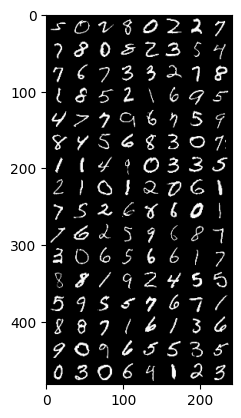

In [27]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
img_grid = np.transpose(img_grid, (1, 2, 0))    # (c, w, h) -> (w, h, c)
plt.imshow(img_grid)

#### 🔥 Create Empty MobileNet v1

接著我們要來<font color=#F08080>創建一個要用來 training 的空 model</font>  
因為這邊只是要分類簡單的 datasets 因此就不使用完整的 MobileNet v1  
而是將所有的 convolution 都減少為 0.25 倍

In [82]:
model = MobileNetv1(in_channels=1, num_classes=10, width_multiplier=0.25)
model.to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 14, 14]              72
       BatchNorm2d-2            [-1, 8, 14, 14]              16
              ReLU-3            [-1, 8, 14, 14]               0
      StandardConv-4            [-1, 8, 14, 14]               0
            Conv2d-5            [-1, 8, 14, 14]              72
       BatchNorm2d-6            [-1, 8, 14, 14]              16
              ReLU-7            [-1, 8, 14, 14]               0
            Conv2d-8           [-1, 16, 14, 14]             128
       BatchNorm2d-9           [-1, 16, 14, 14]              32
             ReLU-10           [-1, 16, 14, 14]               0
DepthwiseSeparableConv-11           [-1, 16, 14, 14]               0
           Conv2d-12             [-1, 16, 7, 7]             144
      BatchNorm2d-13             [-1, 16, 7, 7]              32
             ReLU-14             [

#### 🔥 [Optimizer](https://pytorch.org/docs/stable/optim.html)

這邊我們 <font color="F08080">optimizer</font> 選用 SGD  
learning rate 設定為 0.001，momentum 設定為 0.9

In [83]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#### 🔥 [Loss Function](https://pytorch.org/docs/stable/nn.html#loss-functions)

<font color="F08080">Loss function</font> 選用 [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)  


In [84]:
# Loss function
loss_fn = torch.nn.CrossEntropyLoss()

#### 🔥 Training Function

這邊我們寫一個 <font color="F08080">training function</font>  
每個 epoch 都會呼叫一次

In [85]:
def _train(epoch):

  # Make sure gradient tracking is on, and do a pass over the data
  model.train()

  for step, (inputs, labels) in enumerate(training_loader):
    # Every data instance is an input + label pair
    inputs, labels = inputs.to(device), labels.to(device)

    # Zero your gradients for every batch!
    optimizer.zero_grad()

    # Make predictions for this batch
    outputs = model(inputs)

    # Compute the loss and its gradients
    loss = loss_fn(outputs, labels)
    loss.backward()

    # Adjust learning weights
    optimizer.step()

    # Gather data and report
    if step % 100 == 99:
      print('  step: {} [{}/{}], loss: {}'.format(step + 1, (step + 1) * len(inputs), len(training_loader.dataset), loss.item()))

#### 🔥 Validation Function

這邊我們寫一個 <font color="F08080">validation function</font>  
通常每個 epoch 最後都會做一次 validate 來驗證精準度  
當然也可以一個 epoch 中做很多次

In [86]:
def _validate(epoch, best_accuracy):
  correct = 0

  # Set the model to evaluation mode
  model.eval()

  # Disable gradient computation and reduce memory consumption.
  with torch.no_grad():
    for inputs, labels in validation_loader:
      # Every data instance is an input + label pair
      inputs, labels = inputs.to(device), labels.to(device)

      # Make predictions for this batch
      outputs = model(inputs)

      # Compute the loss
      loss = loss_fn(outputs, labels)

      _, predict_result = torch.max(outputs.data, 1)
      correct += torch.sum(predict_result == labels)

  accuracy = (correct.data.item()) / len(validation_loader.dataset)
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    # save the best
    torch.save(model.state_dict(), './mobilenet-v1-mnist-0.25-28.pt')
    traced_script_module = torch.jit.trace(model, torch.rand(1, 1, 28, 28, device=device))
    scripted_module = torch.jit.script(traced_script_module)
    scripted_module.save('./mobilenet-v1-mnist-0.25-28.torchscript')

  print('Accuracy: {}, Best accuracy: {}'.format(accuracy, best_accuracy))

#### 🔥 Train

這邊為了加快教學速度，因此 epoch 只設定一次即可

In [88]:
best_accuracy = 0
_validate(0, best_accuracy)

for epoch in range(10):
  print('\nEPOCH {}:'.format(epoch + 1))

  _train(epoch)
  _validate(epoch, best_accuracy)

Accuracy: 0.9672, Best accuracy: 0.9672

EPOCH 1:
  step: 100 [12800/60000], loss: 0.04395029693841934
  step: 200 [25600/60000], loss: 0.06555083394050598
  step: 300 [38400/60000], loss: 0.04433298483490944
  step: 400 [51200/60000], loss: 0.03659228980541229
Accuracy: 0.9703, Best accuracy: 0.9703

EPOCH 2:
  step: 100 [12800/60000], loss: 0.05280439183115959
  step: 200 [25600/60000], loss: 0.051098428666591644
  step: 300 [38400/60000], loss: 0.041017308831214905
  step: 400 [51200/60000], loss: 0.11756696552038193
Accuracy: 0.9697, Best accuracy: 0.9697

EPOCH 3:
  step: 100 [12800/60000], loss: 0.09729629755020142
  step: 200 [25600/60000], loss: 0.033370889723300934
  step: 300 [38400/60000], loss: 0.049574434757232666
  step: 400 [51200/60000], loss: 0.07729312777519226
Accuracy: 0.9724, Best accuracy: 0.9724

EPOCH 4:
  step: 100 [12800/60000], loss: 0.048763878643512726
  step: 200 [25600/60000], loss: 0.11319377273321152
  step: 300 [38400/60000], loss: 0.04636250436306
  s

#### 🔥 Save Model

訓練完的 model 我們當然要存起來  
不過 PyTorch 跟很多的 AI Framework 有很大的不同之處，就是 PyTorch 正常只存 model 的參數值  
整體的 model 架構是不會存在 .pt 中的

In [34]:
torch.save(model.state_dict(), './mobilenet-v1-mnist-0.25-28.pt')

當然我們也可以將 model 存成 [TorchScript](https://pytorch.org/docs/stable/jit.html)  
TorchScript 會將 model 架構和參數一同打包在一起  
這樣在之後要 predict 時會非常方便  
但是相對的之後要修改架構或是做 pre-training 的動作時就會非常非常的不方便  

> <font color=#F08080>💡 這邊貼心建議，如果是存為 TorchScript 格式，副檔名盡量用 .torchscript 來讓之後的使用者清楚知道 model 格式</font>

In [37]:
traced_script_module = torch.jit.trace(model, torch.rand(1, 1, 28, 28, device=device))
scripted_module = torch.jit.script(traced_script_module)
scripted_module.save('./mobilenet-v1-mnist-0.25-28.torchscript')

### <font color="FF3030">📌 Predict MobileNet v1</font>

model 訓練完成，下一步就是要來做 predict  

在做驗證時候我們不會使用 train 或是 validate 的 datasets  
通常會有一個 test datasets
不過這時我們沒有 test datasets  
因此就自己用滑鼠畫一張圖片吧！

In [101]:
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box
from IPython.display import display, HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

Image_Size = 256        #@param ["28", "128", "256", "512"] {type:"raw"}
Filename = "my_drawing" #@param [] {allow-input: true}

js_code = '''
<script>
var toolbar = document.getElementById('toolbar')
var save_button = document.getElementById('save-btn')
var canvas = document.getElementById('drawing-board')
var ctx = canvas.getContext('2d')
ctx.strokeStyle = 'black'
ctx.fillRect( 0, 0, canvas.width, canvas.height)
ctx.strokeStyle = 'white'

let isPainting = false
let lineWidth = 10

toolbar.addEventListener('change', e => {
    if(e.target.id === 'stroke') {
        ctx.strokeStyle = e.target.value;
    }

    if(e.target.id === 'lineWidth') {
        lineWidth = e.target.value;
    }
})

toolbar.addEventListener('click', e => {
    if (e.target.id === 'clear-btn') {
        ctx.clearRect(0, 0, canvas.width, canvas.height);
    }
})

const draw = (e) => {
    if(!isPainting) {
        return;
    }

    ctx.lineWidth = lineWidth;
    ctx.lineCap = 'round';

    ctx.lineTo(e.offsetX, e.offsetY);
    ctx.stroke();
}

canvas.addEventListener('mousedown', (e) => {
    isPainting = true;
    ctx.beginPath();
})

canvas.addEventListener('mouseup', e => {
    isPainting = false;
    ctx.stroke();
    ctx.beginPath();
})

canvas.addEventListener('mousemove', draw);

var data = new Promise(resolve => {
  save_button.onclick = () => {
    resolve(canvas.toDataURL('image/jpg'))
    //resolve(save_btn_onclick())
  }
})

function save_btn_onclick() {
  canvas.toDataURL('image/jpg')
}
</script>

<style>
  #container {
    height: 100%%;
    display: flex;
  }

  #toolbar {
    display: flex;
    flex-direction: column;
    padding: 10px;
    width: 80px;
    background-color: #202020;
    margin-bottom: 5px;
  }

  #toolbar * {
    margin-bottom: 6px;
  }

  #toolbar label {
      font-size: 12px;
  }

  #toolbar input {
      width: 100%%;
  }

  #toolbar button {
      background-color: #1565c0;
      border: none;
      border-radius: 4px;
      color:white;
      padding: 5px;
  }

  #save-btn {
    margin-top: 10px;
  }

  canvas {
    border:1px solid black;
    background-color: black;
  }
</style>

<html>
  <section id="container">
    <div id='toolbar'>
      <label for="stroke">Stroke</label>
      <input id="stroke" name='stroke' type="color" value='#FFFFFF'>
      <label for="lineWidth">Line Width</label>
      <input id="lineWidth" name='lineWidth' type="number" value="10">
      <button id='clear-btn'>Clear</button>
      <button id='save-btn'>Save</button>
    </div>
    <div>
      <canvas id="drawing-board" width=%d height=%d></canvas>
    </div>
  </section>
</html>
'''

display(HTML(js_code % (Image_Size, Image_Size)))
data = eval_js("data")

binary = b64decode(data.split(',')[1])
if AttributeError:
  pass
with open(Filename + '.png', 'wb') as f:
  f.write(binary)
print('Image saved to {}'.format(Filename + '.png'))

Image saved to my_drawing.png


#### 🔥 Download Model

下載事先 training 完成的 <font color="F08080">.pt</font> model

In [ ]:
!gdown 1PmK9uWdODjvOCFETDIBGQw2ZqiGbf6Zd

之前有說過 torch 存的只有 model 的相關參數 (weight)  
因此我們需要先創建一個空的 model 架構  
接著在把 weight 載入 model

In [51]:
model = MobileNetv1(in_channels=1, num_classes=10, width_multiplier=0.25)
model.load_state_dict(torch.load('./mobilenet-v1-mnist-0.25-28.pt', map_location=device))
model.to(device)

MobileNetv1(
  (layers): Sequential(
    (0): StandardConv(
      (conv): Sequential(
        (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): DepthwiseSeparableConv(
      (depthwise_conv): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=8, bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (pointwise_conv): Sequential(
        (0): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (2): DepthwiseSeparableConv(
      (depthwise_conv): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), paddin

下載事先 training 完成的 <font color="F08080">.torchscript</font> model

In [ ]:
!gdown 1vMEbKZ2ev7UStFcf0fsoIArQAMtpyIPU

torchscipt 類型的 model 已經把架構存入檔案  
因此我們只要利用 <font color="F08080">torch.jit.load</font> 直接載入即可

In [52]:
script_model = torch.jit.load('./mobilenet-v1-mnist-0.25-28.torchscript')
script_model.to(device)
# print(scipt_model)
# summary(_model, input_size=(1, 28, 28))

RecursiveScriptModule(
  original_name=MobileNetv1
  (layers): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=StandardConv
      (conv): RecursiveScriptModule(
        original_name=Sequential
        (0): RecursiveScriptModule(original_name=Conv2d)
        (1): RecursiveScriptModule(original_name=BatchNorm2d)
        (2): RecursiveScriptModule(original_name=ReLU)
      )
    )
    (1): RecursiveScriptModule(
      original_name=DepthwiseSeparableConv
      (depthwise_conv): RecursiveScriptModule(
        original_name=Sequential
        (0): RecursiveScriptModule(original_name=Conv2d)
        (1): RecursiveScriptModule(original_name=BatchNorm2d)
        (2): RecursiveScriptModule(original_name=ReLU)
      )
      (pointwise_conv): RecursiveScriptModule(
        original_name=Sequential
        (0): RecursiveScriptModule(original_name=Conv2d)
        (1): RecursiveScriptModule(original_name=BatchNorm2d)
        (2): RecursiveScri

#### 🔥 Predict

先載入剛剛我們自己畫的圖片

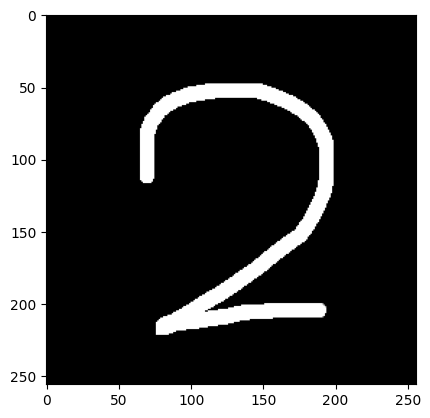

In [102]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('./my_drawing.png').convert('L')
plt.imshow(image, cmap='gray')
plt.show()

建立 predict 用的 transforms

In [103]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [104]:
image = transform(image).unsqueeze(0)
image = image.to(device)

利用 <font color="F08080">.pt</font> model 做 predict

In [105]:
model.eval()
outputs = model(image)[0]
print(outputs.data)

tensor([ 0.6831, -1.7815,  5.2089, -0.1366, -1.4186, -0.2610, -1.8074, -0.9600,
         1.4861, -1.1512], device='cuda:0')


利用 [torch.max](https://pytorch.org/docs/stable/generated/torch.max.html) 來做 outputs 分析，找出最大值的 index

In [106]:
_, predict_result = torch.max(outputs.data, 0)
print(predict_result)

tensor(2, device='cuda:0')
